# Deforestation of the Pacific Temperate Rainforests - Data Collection

In [1]:
# Importing 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Central Coast Region Climate Information (Precipitation / Maximum Temperature / Minimum Temperature)

In [2]:
central_coast = pd.read_csv('./data/noaa/2705672.csv')

In [3]:
central_coast.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,MDPR,MDPR_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,...,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,WDFG,WDFG_ATTRIBUTES,WSFG,WSFG_ATTRIBUTES
0,CA001060815,"BELLA BELLA, BC CA",52.1833,-128.15,43.0,2011-08-25,NaN,NaN,0.0,",,C",...,NaN,NaN,19.8,",,C",6.7,",,C",NaN,NaN,NaN,NaN
1,CA001060815,"BELLA BELLA, BC CA",52.1833,-128.15,43.0,2011-08-26,NaN,NaN,0.0,",,C",...,NaN,NaN,19.8,",,C",5.9,",,C",NaN,NaN,NaN,NaN
2,CA001060815,"BELLA BELLA, BC CA",52.1833,-128.15,43.0,2011-08-27,NaN,NaN,0.0,",,C",...,NaN,NaN,19.2,",,C",10.9,",,C",NaN,NaN,NaN,NaN
3,CA001060815,"BELLA BELLA, BC CA",52.1833,-128.15,43.0,2011-08-28,NaN,NaN,2.0,",,C",...,NaN,NaN,19.0,",,C",11.5,",,C",NaN,NaN,NaN,NaN
4,CA001060815,"BELLA BELLA, BC CA",52.1833,-128.15,43.0,2011-08-29,NaN,NaN,0.8,",,C",...,NaN,NaN,17.3,",,C",11.6,",,C",NaN,NaN,NaN,NaN


In [4]:
central_coast['DATE'] = pd.to_datetime(central_coast['DATE'], format = '%Y/%m/%d', exact = True)

<img src="./photos/bella_coola_weather_stn.png">

The forest data for the Central Coast obtained from Global Forest Watch contains data from 2001 - 2020. For convenience, I would like to use Bella Coola's data from 2001-01-01 to 2006-04-01, and Bella Bella's data from thereafter.

In [5]:
central_coast['NAME'].unique()

array(['BELLA BELLA, BC CA', 'BELLA BELLA A, BC CA',
       'BELLA COOLA A, BC CA', 'BELLA COOLA, BC CA'], dtype=object)

In [6]:
central_coast = central_coast[central_coast['NAME'] != 'BELLA COOLA, BC CA']

In [7]:
central_coast['REGION'] = np.where((central_coast['NAME']== 'BELLA BELLA, BC CA') | (central_coast['NAME']== 'BELLA BELLA A, BC CA'), 'Bella Bella', 'Bella Coola')

In [8]:
central_coast = central_coast[['DATE', 'REGION', 'PRCP', 'TMAX', 'TMIN']]

In [9]:
central_coast = central_coast.sort_values(by='DATE')

In [10]:
central_coast.set_index('DATE', inplace = True)

In [11]:
central_coast.index.value_counts()

2012-06-02    2
2016-06-25    2
2013-07-02    2
2017-09-02    2
2010-07-12    2
             ..
2014-01-28    1
2018-03-16    1
2006-01-12    1
2002-05-18    1
2019-07-07    1
Name: DATE, Length: 6965, dtype: int64

In [12]:
central_coast = central_coast[~((central_coast['REGION'] == 'Bella Coola') & (central_coast.index >= '2006-04-02'))]

In [13]:
central_coast.index.value_counts()

2001-11-04    1
2009-07-21    1
2002-12-21    1
2016-05-24    1
2014-02-10    1
             ..
2012-04-24    1
2004-09-14    1
2005-06-18    1
2002-01-14    1
2012-01-17    1
Name: DATE, Length: 6874, dtype: int64

In [14]:
central_coast

,REGION,PRCP,TMAX,TMIN
DATE,,,,
2001-01-01,Bella Coola,7.2,4.2,0.5
2001-01-02,Bella Coola,20.0,9.6,1.0
2001-01-03,Bella Coola,2.8,6.7,1.0
2001-01-04,Bella Coola,18.2,5.8,-1.2
2001-01-05,Bella Coola,4.0,6.4,1.0
...,...,...,...,...
2020-12-27,Bella Bella,1.5,6.1,-0.8
2020-12-28,Bella Bella,0.0,3.7,-1.4
2020-12-29,Bella Bella,1.1,5.1,-1.8


In [15]:
central_coast.to_csv('./data/cleaned_data/central_coast_clean_daily_summary_noaa.csv')

In [16]:
central_coast_yearly_prcp = pd.DataFrame(central_coast.groupby(central_coast.index.year)[['PRCP']].agg(['count', 'sum']))

In [17]:
central_coast_summer = central_coast[(central_coast.index.map(lambda x: x.month) == 6) |(central_coast.index.map(lambda x: x.month) == 7) |(central_coast.index.map(lambda x: x.month) == 8)]

In [18]:
central_coast_yearly_tmax = pd.DataFrame(central_coast_summer.groupby(central_coast_summer.index.year)[['TMAX']].agg(['max']))
central_coast_yearly_tmin = pd.DataFrame(central_coast_summer.groupby(central_coast_summer.index.year)[['TMIN']].agg(['min']))

In [19]:
central_coast_yearly_prcp['PRCP']['extrapolated_sum'] = central_coast_yearly_prcp['PRCP']['sum']

<ipython-input-19-8d3a1faec61e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  central_coast_yearly_prcp['PRCP']['extrapolated_sum'] = central_coast_yearly_prcp['PRCP']['sum']


In [20]:
central_coast_yearly_summary = pd.DataFrame(central_coast_yearly_prcp.index).set_index('DATE')

In [21]:
central_coast_yearly_summary['PRCP estimate'] = central_coast_yearly_prcp['PRCP']['sum'] / (central_coast_yearly_prcp['PRCP']['count'] / 365)

In [22]:
central_coast_yearly_summary['PRCP above 1400'] = central_coast_yearly_summary >= 1400

In [23]:
central_coast_yearly_summary['TMAX'] = central_coast_yearly_tmax['TMAX']['max']
central_coast_yearly_summary['TMAX below 16 C'] = central_coast_yearly_tmax['TMAX']['max'] < 16
central_coast_yearly_summary['TMIN'] = central_coast_yearly_tmin['TMIN']['min']
central_coast_yearly_summary['TAVG'] = (central_coast_yearly_summary['TMAX'] + central_coast_yearly_summary['TMIN']) / 2
central_coast_yearly_summary['TAVG below 16 C'] = central_coast_yearly_summary['TAVG'] < 16

In [24]:
central_coast_yearly_summary

,PRCP estimate,PRCP above 1400,TMAX,TMAX below 16 C,TMIN,TAVG,TAVG below 16 C
DATE,,,,,,,
2001,1203.100000,False,29.0,False,2.6,15.80,True
2002,1035.135989,False,31.0,False,2.3,16.65,False
2003,1192.479042,False,33.2,False,3.4,18.30,False
2004,1484.433060,True,34.7,False,3.4,19.05,False
2005,1418.691617,True,31.2,False,5.3,18.25,False
2006,2056.948324,True,28.9,False,4.4,16.65,False
2007,3786.482808,True,32.1,False,5.4,18.75,False
2008,2979.971671,True,28.1,False,2.7,15.40,True
2009,2725.775140,True,32.0,False,4.0,18.00,False


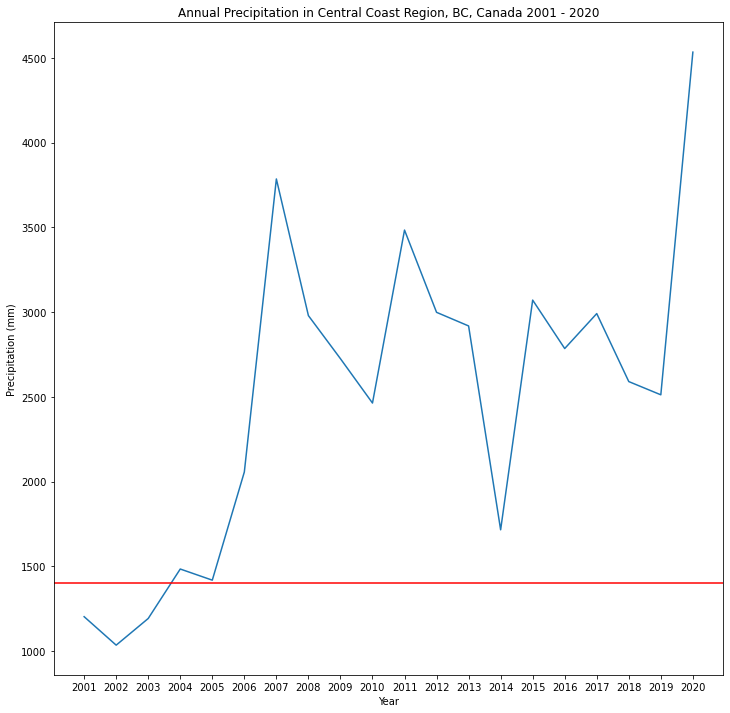

In [25]:
plt.figure(figsize = (12, 12))
plt.plot(central_coast_yearly_summary.index, central_coast_yearly_summary['PRCP estimate'])
plt.axhline(y=1400, color='r', linestyle='-')
plt.title('Annual Precipitation in Central Coast Region, BC, Canada 2001 - 2020')
plt.xticks(central_coast_yearly_summary.index)
plt.xlabel('Year')
plt.ylabel('Precipitation (mm)');

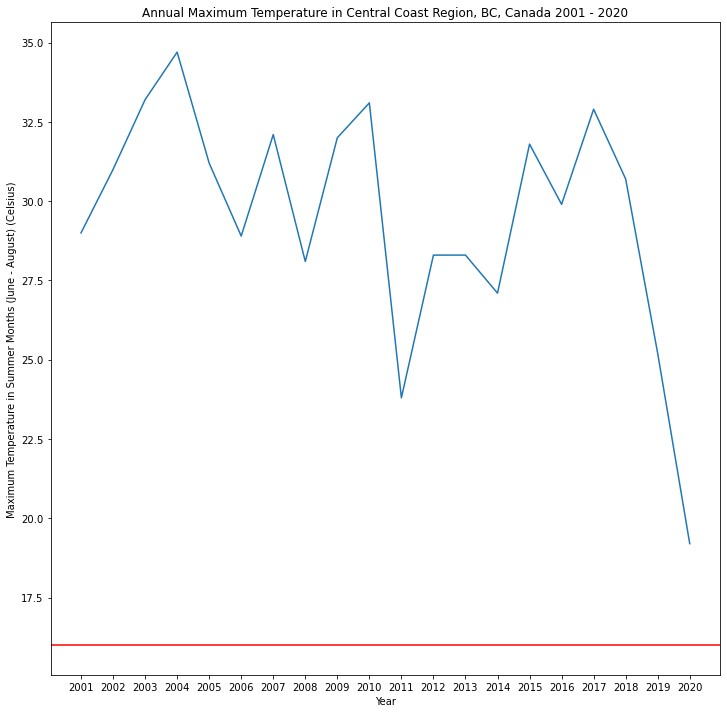

In [26]:
plt.figure(figsize = (12, 12))
plt.plot(central_coast_yearly_summary.index, central_coast_yearly_summary['TMAX'])
plt.axhline(y=16, color='r')
plt.title('Annual Maximum Temperature in Central Coast Region, BC, Canada 2001 - 2020')
plt.xticks(central_coast_yearly_summary.index)
plt.xlabel('Year')
plt.ylabel('Maximum Temperature in Summer Months (June - August) (Celsius)');

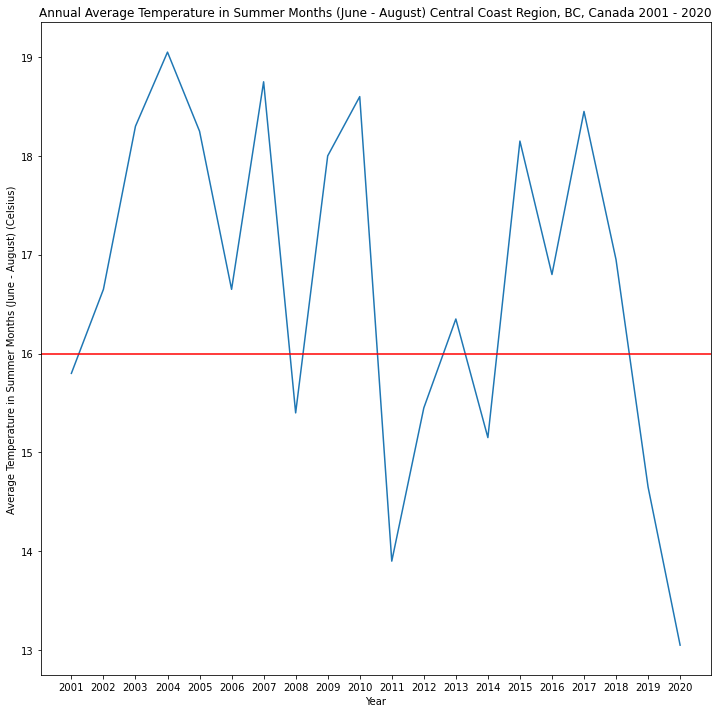

In [27]:
plt.figure(figsize = (12, 12))
plt.plot(central_coast_yearly_summary.index, central_coast_yearly_summary['TAVG'])
plt.axhline(y=16, color='r', linestyle='-')
plt.title('Annual Average Temperature in Summer Months (June - August) Central Coast Region, BC, Canada 2001 - 2020')
plt.xticks(central_coast_yearly_summary.index)
plt.xlabel('Year')
plt.ylabel('Average Temperature in Summer Months (June - August) (Celsius)');

### Central Coast Tree Loss Data

|File Name|Organization|Dataset Location|FUNCTION (as outlined by Organization)|Description|
|---|---|---|---|---|
|treecover_extent_2000__ha.csv|Global Forest Watch|[TREE COVER LOSS IN CENTRAL COAST, BRITISH COLUMBIA, CANADA](https://gfw.global/2YqqSkz)|Shows year-by-year tree cover loss, defined as stand level replacement of vegetation greater than 5 meters, within the selected area. </br> The tree cover loss data set is a collaboration of the University of Maryland, Google, USGS, and NASA, and uses Landsat satellite images to map annual tree cover loss at a 30 × 30 meter resolution. </br> <i>Note that “tree cover loss” is not the same as “deforestation” – tree cover loss includes change in both natural and planted forest, and does not need to be human caused. The data from 2011 onward were produced with an updated methodology that may capture additional loss. Comparisons between the original 2001-2010 data and future years should be performed with caution.</i>|Shows forest area and total area of region in 2020|
|treecover_loss__ha.csv|Global Forest Watch|[TREE COVER LOSS IN CENTRAL COAST, BRITISH COLUMBIA, CANADA](https://gfw.global/2YqqSkz)|Shows year-by-year tree cover loss, defined as stand level replacement of vegetation greater than 5 meters, within the selected area. </br> The tree cover loss data set is a collaboration of the University of Maryland, Google, USGS, and NASA, and uses Landsat satellite images to map annual tree cover loss at a 30 × 30 meter resolution. </br> <i>Note that “tree cover loss” is not the same as “deforestation” – tree cover loss includes change in both natural and planted forest, and does not need to be human caused. The data from 2011 onward were produced with an updated methodology that may capture additional loss. Comparisons between the original 2001-2010 data and future years should be performed with caution.</i>|Shows annual tree loss|
|modis_burned_area__ha.csv|Global Forest Watch|[CUMULATIVE BURNED AREA IN CENTRAL COAST, BRITISH COLUMBIA, CANADA](https://gfw.global/3BQJOYm)|Displays monthly burned area extent and date of burn based on differences in a burn-sensitive Vegetation Index derived from MODIS shortwave infrared surface reflectance bands|Shows annual burned area|


In [28]:
tree_cover_loss = pd.read_csv('./data/gfw/tree_cover_loss/treecover_loss__ha.csv')

In [29]:
tree_cover_loss.drop(columns = ['iso', 'adm1', 'adm2'], inplace=True)
tree_cover_loss.rename(columns = {'umd_tree_cover_loss__year' : 'DATE', 'umd_tree_cover_loss__ha' : 'area_tree_cover_loss_Ha', 'gfw_gross_emissions_co2e_all_gases__Mg' : 'co2_emission_Mg'}, inplace = True)
tree_cover_loss = tree_cover_loss.set_index('DATE')

In [30]:
tree_cover_loss.head()

,area_tree_cover_loss_Ha,co2_emission_Mg
DATE,,
2001,1203.934039,5.147169e+05
2002,1298.841284,4.873691e+05
2003,796.634859,3.320122e+05
2004,10855.552080,2.194606e+06
2005,3906.168671,1.283370e+06


In [31]:
for year in range(2001, 2021):
    if year not in list(tree_cover_loss.index):
        print(f'{year} IS MISSING DATA')
    else:
        print(f'{year} has data reported')

2001 has data reported
2002 has data reported
2003 has data reported
2004 has data reported
2005 has data reported
2006 has data reported
2007 has data reported
2008 has data reported
2009 has data reported
2010 has data reported
2011 has data reported
2012 has data reported
2013 has data reported
2014 has data reported
2015 has data reported
2016 has data reported
2017 has data reported
2018 has data reported
2019 has data reported
2020 has data reported


In [32]:
cumulative_burned_area = pd.read_csv('./data/gfw/cumulative_burned_area/modis_burned_area__ha.csv') 

In [33]:
cumulative_burned_area.drop(columns = ['iso', 'adm1', 'adm2', 'alert__week'], inplace=True)
cumulative_burned_area.rename(columns = {'alert__year' : 'DATE', 'burn_area__ha' : 'area_burn_Ha'}, inplace = True)
cumulative_burned_area = cumulative_burned_area.set_index('DATE')

In [34]:
annual_cumulative_burned_area = cumulative_burned_area.groupby('DATE').agg('sum')

In [35]:
for year in range(2001, 2021):
    if year not in list(annual_cumulative_burned_area.index):
        print(f'{year} IS MISSING DATA')

2006 IS MISSING DATA
2007 IS MISSING DATA
2008 IS MISSING DATA
2011 IS MISSING DATA
2016 IS MISSING DATA
2019 IS MISSING DATA


In [36]:
annual_cumulative_burned_area

,area_burn_Ha
DATE,
2001,145.388563
2002,25.373653
2003,100.980558
2004,15065.489648
2005,33.792675
2009,5091.424460
2010,4683.797245
2012,25.256939
2013,16.984601


In [37]:
annual_cumulative_burned_area.reset_index(inplace = True)

In [38]:
annual_cumulative_burned_area

,DATE,area_burn_Ha
0,2001,145.388563
1,2002,25.373653
2,2003,100.980558
3,2004,15065.489648
4,2005,33.792675
5,2009,5091.424460
6,2010,4683.797245
7,2012,25.256939
8,2013,16.984601
9,2014,519.653629


In [39]:
annual_cumulative_burned_area.loc[-1] = [2006, 0]
annual_cumulative_burned_area.index = annual_cumulative_burned_area.index + 1
annual_cumulative_burned_area.loc[-1] = [2007, 0]
annual_cumulative_burned_area.index = annual_cumulative_burned_area.index + 1
annual_cumulative_burned_area.loc[-1] = [2008, 0]
annual_cumulative_burned_area.index = annual_cumulative_burned_area.index + 1
annual_cumulative_burned_area.loc[-1] = [2011, 0]
annual_cumulative_burned_area.index = annual_cumulative_burned_area.index + 1
annual_cumulative_burned_area.loc[-1] = [2016, 0]
annual_cumulative_burned_area.index = annual_cumulative_burned_area.index + 1
annual_cumulative_burned_area.loc[-1] = [2019, 0]
annual_cumulative_burned_area.index = annual_cumulative_burned_area.index + 1

In [40]:
annual_cumulative_burned_area = annual_cumulative_burned_area.set_index('DATE')

In [41]:
for year in range(2001, 2021):
    if year not in list(annual_cumulative_burned_area.index):
        print(f'{year} IS MISSING DATA')

In [42]:
merged_tree_loss_df = tree_cover_loss.merge(annual_cumulative_burned_area, left_on = tree_cover_loss.index, right_on = annual_cumulative_burned_area.index, how='inner')
merged_tree_loss_df.rename(columns = {'key_0' : 'DATE'}, inplace = True)
merged_tree_loss_df.set_index('DATE', inplace = True)


In [43]:
merged_tree_loss_df

,area_tree_cover_loss_Ha,co2_emission_Mg,area_burn_Ha
DATE,,,
2001,1203.934039,5.147169e+05,145.388563
2002,1298.841284,4.873691e+05,25.373653
2003,796.634859,3.320122e+05,100.980558
2004,10855.552080,2.194606e+06,15065.489648
2005,3906.168671,1.283370e+06,33.792675
2006,1052.593717,4.392463e+05,0.000000
2007,2216.374182,8.476379e+05,0.000000
2008,1278.326130,5.850874e+05,0.000000
2009,4125.643557,1.211515e+06,5091.424460


In [44]:
merged_tree_loss_df = merged_tree_loss_df[['area_tree_cover_loss_Ha', 'area_burn_Ha', 'co2_emission_Mg']]

In [45]:
area_central_coast = pd.read_csv('./data/gfw/tree_cover_loss/treecover_extent_2000__ha.csv') 

In [46]:
area_central_coast

,iso,adm1,adm2,umd_tree_cover_extent_2000__ha,area__ha
0,CAN,2,5,1.603821e+06,2.531460e+06


In [47]:
area_forest_central_coast_2020 = area_central_coast['umd_tree_cover_extent_2000__ha'].loc[0]

In [48]:
area_total_central_coast_2020 = area_central_coast['area__ha'].loc[0]

In [49]:
area_nonforest_central_coast_2020 = area_total_central_coast_2020 - area_forest_central_coast_2020

In [50]:
series_forest_area_years = [value for value in merged_tree_loss_df['area_tree_cover_loss_Ha'].index]

In [51]:
series_forest_area_years

[2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020]

In [52]:
current_area = area_forest_central_coast_2020
series_forest_area_year_start = [area_forest_central_coast_2020]
for year in series_forest_area_years[:-1]:
    current_area = current_area - float(merged_tree_loss_df[merged_tree_loss_df.index == year]['area_tree_cover_loss_Ha'])
    series_forest_area_year_start.append(current_area)

In [53]:
series_forest_area_year_start = np.array(series_forest_area_year_start)

In [54]:
series_forest_area_year_start

array([1603821.49814106, 1602617.56410186, 1601318.7228183 ,
       1600522.08795942, 1589666.53587904, 1585760.36720808,
       1584707.77349095, 1582491.39930849, 1581213.07317895,
       1577087.42962193, 1573840.7758723 , 1572457.80824113,
       1570941.51649494, 1569846.9470587 , 1567956.03255424,
       1566366.04347906, 1564603.48033866, 1559747.21010599,
       1556764.54964203, 1551976.10813238])

In [55]:
merged_tree_df = merged_tree_loss_df.copy()
merged_tree_df['area_tree_cover_jan1'] = series_forest_area_year_start
merged_tree_df['area_tree_cover_dec31'] = merged_tree_df['area_tree_cover_jan1'] - merged_tree_df['area_tree_cover_loss_Ha']
merged_tree_df['percentage_tree_cover_loss'] = merged_tree_df['area_tree_cover_loss_Ha'] / merged_tree_df['area_tree_cover_jan1']

In [56]:
# In February 2016, an agreement was made to preserve 85% of the Great Bear Rainforests, allowing 15% for logging.
land_set_aside_for_logging = float(merged_tree_df[merged_tree_df.index == 2016]['area_tree_cover_jan1']) * 0.15

percentage_tree_cover_loss_over_logging_land = []
for year in series_forest_area_years[:-5]:
    percentage_tree_cover_loss_over_logging_land.append(float(merged_tree_df[merged_tree_df.index == year]['percentage_tree_cover_loss']))
for year in series_forest_area_years[-5:]:
    percentage_tree_cover_loss_over_logging_land.append(float(merged_tree_df[merged_tree_df.index == year]['area_tree_cover_loss_Ha']) / land_set_aside_for_logging)

merged_tree_df['percentage_tree_cover_loss_over_logging_land'] = percentage_tree_cover_loss_over_logging_land

In [57]:
merged_tree_df = merged_tree_df[['area_tree_cover_jan1', 'area_tree_cover_loss_Ha', 'area_burn_Ha', 'area_tree_cover_dec31', 'percentage_tree_cover_loss', 'percentage_tree_cover_loss_over_logging_land', 'co2_emission_Mg']]

In [58]:
merged_tree_df

,area_tree_cover_jan1,area_tree_cover_loss_Ha,area_burn_Ha,area_tree_cover_dec31,percentage_tree_cover_loss,percentage_tree_cover_loss_over_logging_land,co2_emission_Mg
DATE,,,,,,,
2001,1.603821e+06,1203.934039,145.388563,1.602618e+06,0.000751,0.000751,5.147169e+05
2002,1.602618e+06,1298.841284,25.373653,1.601319e+06,0.000810,0.000810,4.873691e+05
2003,1.601319e+06,796.634859,100.980558,1.600522e+06,0.000497,0.000497,3.320122e+05
2004,1.600522e+06,10855.552080,15065.489648,1.589667e+06,0.006783,0.006783,2.194606e+06
2005,1.589667e+06,3906.168671,33.792675,1.585760e+06,0.002457,0.002457,1.283370e+06
2006,1.585760e+06,1052.593717,0.000000,1.584708e+06,0.000664,0.000664,4.392463e+05
2007,1.584708e+06,2216.374182,0.000000,1.582491e+06,0.001399,0.001399,8.476379e+05
2008,1.582491e+06,1278.326130,0.000000,1.581213e+06,0.000808,0.000808,5.850874e+05
2009,1.581213e+06,4125.643557,5091.424460,1.577087e+06,0.002609,0.002609,1.211515e+06


In [59]:
central_coast_2001_2020_summary = central_coast_yearly_summary.merge(merged_tree_df, left_on = central_coast_yearly_summary.index, right_on = merged_tree_df.index, how = 'inner')
central_coast_2001_2020_summary.rename(columns = {'key_0' : 'YEAR'}, inplace = True)
central_coast_2001_2020_summary.set_index('YEAR', inplace = True)

In [60]:
central_coast_2001_2020_summary

,PRCP estimate,PRCP above 1400,TMAX,TMAX below 16 C,TMIN,TAVG,TAVG below 16 C,area_tree_cover_jan1,area_tree_cover_loss_Ha,area_burn_Ha,area_tree_cover_dec31,percentage_tree_cover_loss,percentage_tree_cover_loss_over_logging_land,co2_emission_Mg
YEAR,,,,,,,,,,,,,,
2001,1203.100000,False,29.0,False,2.6,15.80,True,1.603821e+06,1203.934039,145.388563,1.602618e+06,0.000751,0.000751,5.147169e+05
2002,1035.135989,False,31.0,False,2.3,16.65,False,1.602618e+06,1298.841284,25.373653,1.601319e+06,0.000810,0.000810,4.873691e+05
2003,1192.479042,False,33.2,False,3.4,18.30,False,1.601319e+06,796.634859,100.980558,1.600522e+06,0.000497,0.000497,3.320122e+05
2004,1484.433060,True,34.7,False,3.4,19.05,False,1.600522e+06,10855.552080,15065.489648,1.589667e+06,0.006783,0.006783,2.194606e+06
2005,1418.691617,True,31.2,False,5.3,18.25,False,1.589667e+06,3906.168671,33.792675,1.585760e+06,0.002457,0.002457,1.283370e+06
2006,2056.948324,True,28.9,False,4.4,16.65,False,1.585760e+06,1052.593717,0.000000,1.584708e+06,0.000664,0.000664,4.392463e+05
2007,3786.482808,True,32.1,False,5.4,18.75,False,1.584708e+06,2216.374182,0.000000,1.582491e+06,0.001399,0.001399,8.476379e+05
2008,2979.971671,True,28.1,False,2.7,15.40,True,1.582491e+06,1278.326130,0.000000,1.581213e+06,0.000808,0.000808,5.850874e+05
2009,2725.775140,True,32.0,False,4.0,18.00,False,1.581213e+06,4125.643557,5091.424460,1.577087e+06,0.002609,0.002609,1.211515e+06


In [61]:
central_coast_2001_2020_summary.to_csv('./data/cleaned_data/central_coast_clean_summary.csv')